Linear Regression with Back propogation:

We generate a noisy dataset:

In [1]:
import numpy as np

np.random.seed(0)
n_samples = 1000
X = np.random.rand(n_samples)*10
X = np.expand_dims(X, axis=-1)
noise = np.random.randn(n_samples)*4.0
noise = np.expand_dims(noise, axis=-1)
ground_truth = 5 * X + 3
y = ground_truth + noise

X and y are the features and the label, respectively. We can look at the format of the data:

In [2]:
print(type(X))
print(type(y))

print(X.shape)
print(y.shape)

print(X.dtype)
print(y.dtype)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(1000, 1)
(1000, 1)
float64
float64


As we can see, X and y are numpy arrays. We generated 1000 samples, with one feature per sample, and y are the corresponding labels for each sample.

## Plotting the data

When working with a dataset, it is always helpful to visualize the data that we are working with, in order to be able to check if our results are meaningful. We will use matplotlib to plot the data.

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

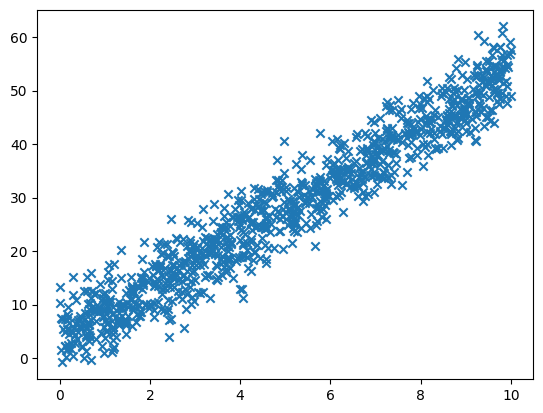

In [4]:
plt.figure()
plt.scatter(X, y, marker="x")
plt.show()

## Performing linear regression with backpropagation

Tasks in this notebook are:
 - Implement the gradient using the [torch.nn.MSELoss](https://pytorch.org/docs/stable/nn.html#mseloss) class for the loss calculation. Also, use a pytorch optimizer such as [torch.optim.SGD](https://pytorch.org/docs/stable/optim.html#torch.optim.SGD) instead of updating the weights manually. Using an optimizer is done in the following way:
 
```python
optimizer = optim.SGD([weights], lr=my_learning_rate)
   
# in the optimization loop:
optim.zero_grad() # equivalent to weights.grad.zero_()
# loss calculation here, then
optim.step() # equivalent to weights -= learning_rate*weights.grad
```


## Solution

In [5]:
import torch
ones = np.ones(X.shape[0])
X_ = np.c_[X, ones]

X_mat = np.matrix(X_)
X_tensor_mat = torch.as_tensor(X_mat)

y_mat = np.matrix(y)
y_tensor_mat = torch.as_tensor(y_mat )

In [6]:

def generate_weights(num_features):
    np.random.seed(42) # this is just so that we all generate the same weights and thus get the same results
    return (np.random.rand(num_features).reshape(-1, 1) * 2 - 1) / np.sqrt(num_features)

weights = generate_weights(X.shape[-1] + 1) # +1 because you will add the column of ones later on
print(weights.shape)
weights_tensor = torch.tensor(weights, requires_grad=True)
print(weights_tensor)

(2, 1)
tensor([[-0.1774],
        [ 0.6374]], dtype=torch.float64, requires_grad=True)


In [7]:

iterations = 1000
learning_rate = 0.01
loss_history = []


optimizer = torch.optim.SGD([weights_tensor], lr=learning_rate)
criterion = torch.nn.MSELoss()

for i in range(iterations):
    
    predictions = torch.mm(X_tensor_mat , weights_tensor)
    loss = criterion(y_tensor_mat, predictions) 
    loss.backward()

    optimizer.step() 
    optimizer.zero_grad() 

    if i % 100 == 0:
        print(f"Iteration {i}: Loss = {loss:.4f}")

print("\nFinal weights:")
print(weights_tensor)
print(f"Final loss: {loss:.4f}")

Iteration 0: Loss = 1030.5997
Iteration 100: Loss = 15.2447
Iteration 200: Loss = 15.0411
Iteration 300: Loss = 14.9663
Iteration 400: Loss = 14.9389
Iteration 500: Loss = 14.9288
Iteration 600: Loss = 14.9251
Iteration 700: Loss = 14.9238
Iteration 800: Loss = 14.9233
Iteration 900: Loss = 14.9231

Final weights:
tensor([[4.9631],
        [3.2963]], dtype=torch.float64, requires_grad=True)
Final loss: 14.9230
